In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import sys


In [80]:
from importlib import reload
import additionaldataLoader
reload(additionaldataLoader)

<module 'additionaldataLoader' from 'c:\\Users\\aurel\\ADA_project_2024\\ada-2024-project-teamcsx24\\src/data\\additionaldataLoader.py'>

In [81]:
path = 'src/data'
sys.path.append(path)
from dataLoader import loadDataframe
from additionaldataLoader import loadAdditionalDataframe

# Original movie data

## Data Importation

In [ ]:
path_to_directory = 'data/cleanData/'
df_movies = loadDataframe('movies', path_to_directory)

c:\Users\aurel\ADA_project_2024\ada-2024-project-teamcsx24\src/data\dataLoader.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_convert] = df[columns_to_convert].applymap(eval)


In [8]:
df_movies.notnull().sum()

wiki_id                  81741
freebase_id              81741
original_title           81741
release_date             74839
revenue                   8401
runtime                  61291
languages                81741
countries                81741
genres                   81741
countries_freebase_id    81741
languages_freebase_id    81741
genres_freebase_id       81741
dtype: int64

In [82]:
df_inflation_additional_annual = loadAdditionalDataframe('inflation_annual', path_to_directory)
df_inflation_additional_annual.head(2)

,year,CPI
0,1913,9.883333
1,1914,10.016667


## Dataframe for Economy part

## Filtering on notna box office revenue

In [83]:
df_movies_eco = df_movies[df_movies['revenue'].notna()]
df_movies_eco['year'] = df_movies_eco['release_date'].dt.year

C:\Users\aurel\AppData\Local\Temp\ipykernel_8448\1281843668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_eco['year'] = df_movies_eco['release_date'].dt.year


In [23]:
df_movies_eco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 0 to 81732
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   wiki_id                8401 non-null   int64         
 1   freebase_id            8401 non-null   object        
 2   original_title         8401 non-null   object        
 3   release_date           8328 non-null   datetime64[ns]
 4   revenue                8401 non-null   float64       
 5   runtime                8302 non-null   float64       
 6   languages              8401 non-null   object        
 7   countries              8401 non-null   object        
 8   genres                 8401 non-null   object        
 9   countries_freebase_id  8401 non-null   object        
 10  languages_freebase_id  8401 non-null   object        
 11  genres_freebase_id     8401 non-null   object        
 12  year                   8328 non-null   float64       
dtypes: date

In [15]:
df_movies_eco['revenue'].describe()

count    8.401000e+03
mean     4.799363e+07
std      1.121753e+08
min      1.000000e+04
25%      2.083193e+06
50%      1.063969e+07
75%      4.071696e+07
max      2.782275e+09
Name: revenue, dtype: float64

In [30]:
df_movies_eco.notnull().sum()

wiki_id                  8401
freebase_id              8401
original_title           8401
release_date             8328
revenue                  8401
runtime                  8302
languages                8401
countries                8401
genres                   8401
countries_freebase_id    8401
languages_freebase_id    8401
genres_freebase_id       8401
year                     8328
dtype: int64

## Recalculating box office revenue indexed to US inflation

In [33]:
df_movies_eco = df_movies_eco.dropna(subset=['year'])
df_movies_eco = df_movies_eco[df_movies_eco['year'] != 1897]


In [34]:
df_movies_eco.notnull().sum()

wiki_id                  8327
freebase_id              8327
original_title           8327
release_date             8327
revenue                  8327
runtime                  8243
languages                8327
countries                8327
genres                   8327
countries_freebase_id    8327
languages_freebase_id    8327
genres_freebase_id       8327
year                     8327
dtype: int64

In [16]:
reference_year = 2016
cpi_reference = df_inflation_additional_annual[df_inflation_additional_annual['year'] == reference_year]['CPI'].values[0]

In [38]:
df_movies_eco['revenue_adj'] = df_movies_eco.apply(lambda x: x['revenue'] * cpi_reference / df_inflation_additional_annual[df_inflation_additional_annual['year'] == x['year']]['CPI'].values[0], axis=1)

In [39]:
df_movies_eco['revenue_adj'].describe()

count    8.327000e+03
mean     8.255903e+07
std      2.092640e+08
min      1.100670e+04
25%      6.849139e+06
50%      2.300468e+07
75%      7.573858e+07
max      6.941575e+09
Name: revenue_adj, dtype: float64

In [40]:
df_movies_eco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8327 entries, 0 to 81732
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   wiki_id                8327 non-null   int64         
 1   freebase_id            8327 non-null   object        
 2   original_title         8327 non-null   object        
 3   release_date           8327 non-null   datetime64[ns]
 4   revenue                8327 non-null   float64       
 5   runtime                8243 non-null   float64       
 6   languages              8327 non-null   object        
 7   countries              8327 non-null   object        
 8   genres                 8327 non-null   object        
 9   countries_freebase_id  8327 non-null   object        
 10  languages_freebase_id  8327 non-null   object        
 11  genres_freebase_id     8327 non-null   object        
 12  year                   8327 non-null   float64       
 13  revenue

## Free exchange of goods and services

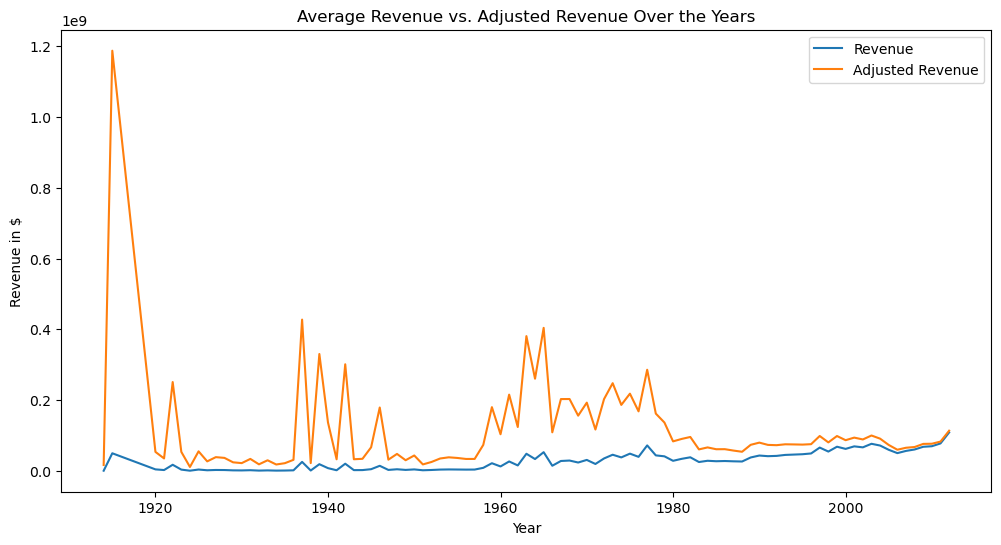

In [47]:
# plot the average revenue vs. adjusted revenue over the years
plt.figure(figsize=(12, 6))
plt.plot(df_movies_eco.groupby('year')['revenue'].mean(), label='Revenue')
plt.plot(df_movies_eco.groupby('year')['revenue_adj'].mean(), label='Adjusted Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue in $')
plt.title('Average Revenue vs. Adjusted Revenue Over the Years')
plt.legend()


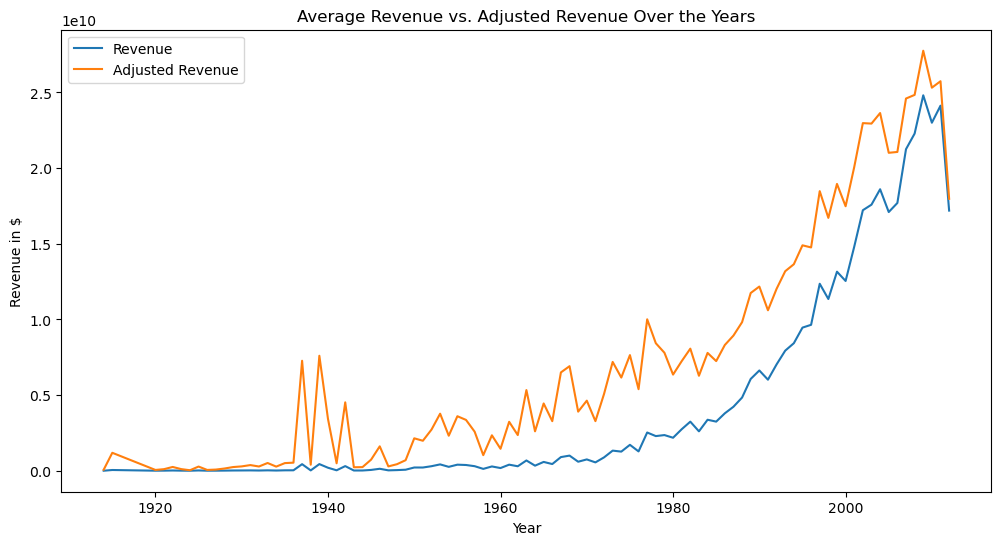

In [48]:
# plot the revenue vs. adjusted revenue over the years
plt.figure(figsize=(12, 6))
plt.plot(df_movies_eco.groupby('year')['revenue'].sum(), label='Revenue')
plt.plot(df_movies_eco.groupby('year')['revenue_adj'].sum(), label='Adjusted Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue in $')
plt.title('Average Revenue vs. Adjusted Revenue Over the Years')
plt.legend()


In [36]:
from matplotlib_venn import venn2

def intersectionIMDbID(df1, df2, name1, name2, id_column='id'):
    # Ids extraction from each DataFrame
    ids1 = set(df1[id_column].unique())
    ids2 = set(df2[id_column].unique())
    
    # Compute intersection and differences
    intersection = ids1 & ids2
    only_df1 = ids1 - ids2
    only_df2 = ids2 - ids1
    
    # Count elements
    count_intersection = len(intersection)
    count_only_df1 = len(only_df1)
    count_only_df2 = len(only_df2)
    total = count_intersection + count_only_df1 + count_only_df2

    # Venn diagram
    venn = venn2(subsets=(1, 1, 1), set_labels=(name1, name2))
    
    # Add counts
    venn.get_label_by_id('10').set_text(f'{count_only_df1}')
    venn.get_label_by_id('01').set_text(f'{count_only_df2}')
    venn.get_label_by_id('11').set_text(f'{count_intersection}')
    
    plt.title("Intersection between " + name1 + " and " + name2)
    plt.show()

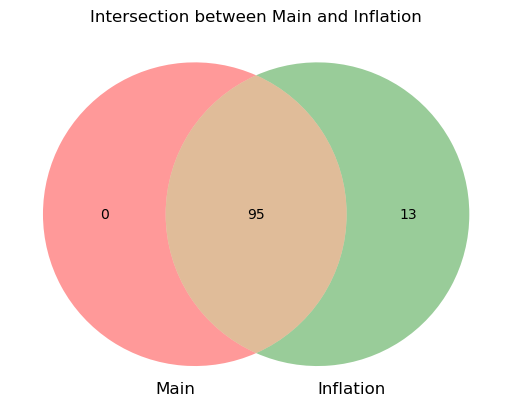

In [35]:
intersectionIMDbID(df_movies_eco, df_inflation_additional_annual, 'Main', 'Inflation', id_column='year')

<Axes: xlabel='year'>

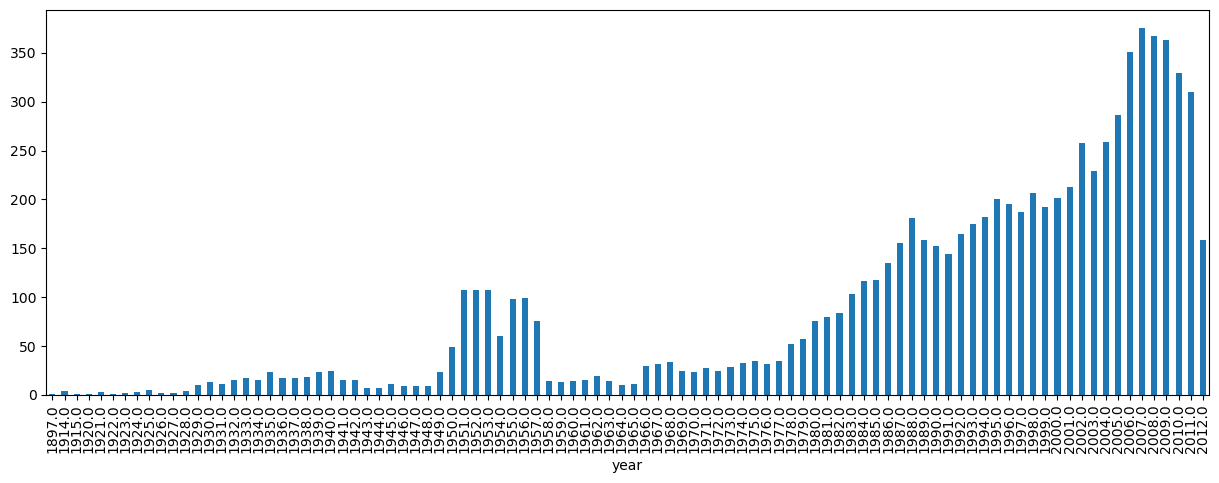

In [29]:
df_movies_eco['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

# Free trade in goods and services

In [50]:
df_movies_eco_exploded = df_movies_eco.explode('countries')

In [ ]:
df_movies_eco_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11084 entries, 0 to 81732
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   wiki_id                11084 non-null  int64         
 1   freebase_id            11084 non-null  object        
 2   original_title         11084 non-null  object        
 3   release_date           11084 non-null  datetime64[ns]
 4   revenue                11084 non-null  float64       
 5   runtime                10993 non-null  float64       
 6   languages              11084 non-null  object        
 7   countries              10985 non-null  object        
 8   genres                 11084 non-null  object        
 9   countries_freebase_id  11084 non-null  object        
 10  languages_freebase_id  11084 non-null  object        
 11  genres_freebase_id     11084 non-null  object        
 12  year                   11084 non-null  float64       
 13  revenu

In [63]:
countries_per_movie = df_movies_eco_exploded.groupby(df_movies_eco_exploded['freebase_id'])['countries'].unique()
df_countries_per_movie = pd.DataFrame(countries_per_movie)
df_countries_per_movie.head(10)

,countries
freebase_id,
/m/011wtv,[United States of America]
/m/011x_4,[United States of America]
/m/011xg5,[United States of America]
/m/011xrr,[United States of America]
/m/011yd2,[United States of America]
/m/011ydl,"[United States of America, Australia]"
/m/011yfd,"[France, Belgium, Italy]"
/m/011yg9,"[United States of America, United Kingdom]"
/m/011yhm,"[United States of America, United Kingdom]"


### 2. Créer la matrice de co-occurrence

In [ ]:
from itertools import combinations

def createEdges(movie) :
    countries = countries_per_movie[movie]
    #countries_cleaned = [(country.strip("[]'\"")) for country in countries]
    #creates a list with all possible pairs of countries
    pairs = tuple(combinations(countries, 2))
    return pairs



In [ ]:
import seaborn as sns
